In [1]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
# from statsmodels.tsa.arima_model import ARIMAResults
import matplotlib.pyplot as plt
import numpy as np
# import pprint
# import itertools

In [2]:
# load dataset
df = pd.read_csv("/home/mind/projects/projects/gold_rate_prediction/1990-2021.csv", index_col=0)
df = df.loc[:, ['India(INR)']]
df = df.reset_index()
df = df[df.index % 3 == 2]
df = df.reset_index()
df = df.drop('index', axis = 1) # 1 for column and 0 for row
df.index = pd.to_datetime(df.Date, dayfirst=True)
df = df.drop('Date', axis = 1)
df

,India(INR)
Date,
1990-03-30,6334.4
1990-06-29,6140.5
1990-09-28,7333.1
1990-12-31,6948.9
1991-03-29,6942.2
...,...
2020-06-30,133498.2
2020-09-30,139215.5
2020-12-31,137922.2


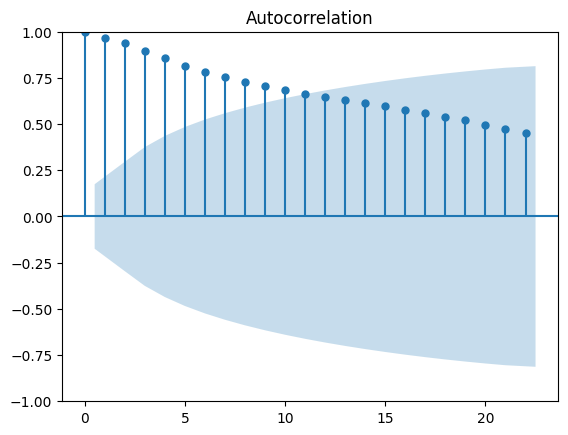

In [3]:
# ACF plot
plot_acf(df)
plt.show()

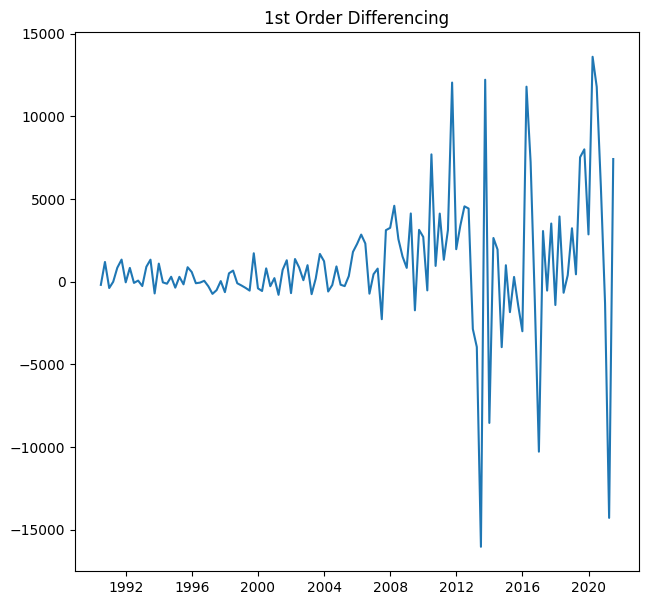

In [4]:
# 1st Order Differencing
f = plt.figure(figsize=(16, 7))
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df.diff())

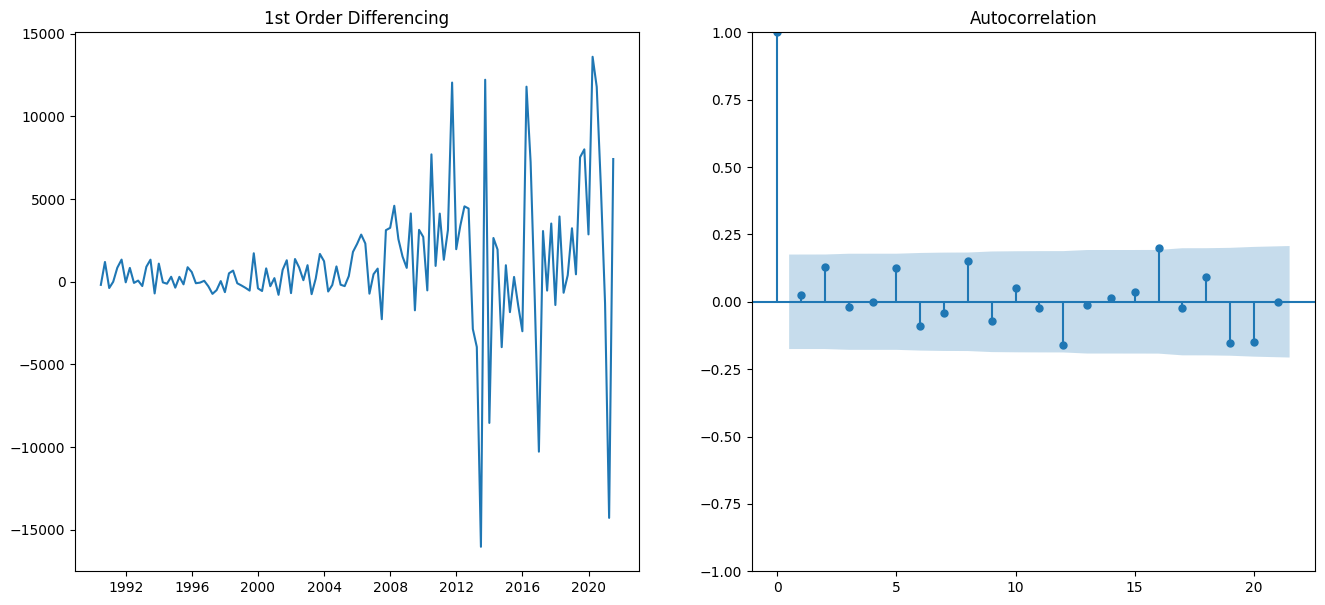

In [5]:
# 1st Order Differencing
f = plt.figure(figsize=(16, 7))
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df.diff())

ax2 = f.add_subplot(122)
plot_acf(df.diff().dropna(), ax = ax2)
plt.show()

In [6]:
# adfuller test
result = adfuller(df.dropna())
print('p-value: ', result[1])

p-value:  0.9972613996967749


In [7]:
result = adfuller(df.diff().dropna())
print('p-value: ', result[1])

p-value:  1.0471786645639584e-08


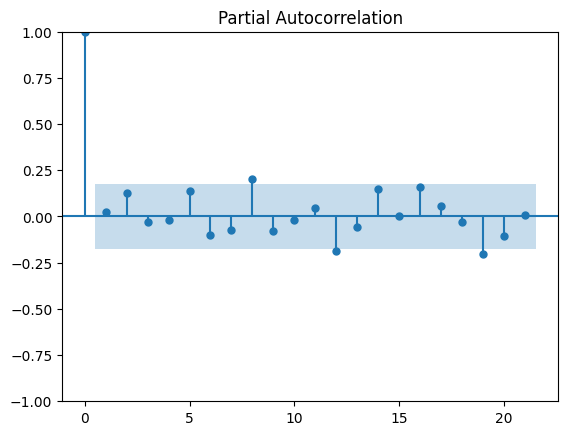

In [8]:
# PACF plot
plot_pacf(df.diff().dropna())
plt.show()

In [9]:
arima_model = ARIMA(df.diff(), order = (1, 2, 1))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:             India(INR)   No. Observations:                  126
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -1223.211
Date:                Tue, 19 Dec 2023   AIC                           2452.422
Time:                        09:55:25   BIC                           2460.883
Sample:                    03-30-1990   HQIC                          2455.859
                         - 06-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5908      0.052    -11.382      0.000      -0.693      -0.489
ma.L1         -1.0000      0.066    -15.083      0.000      -1.130      -0.870
sigma2      2.091e+07   3.17e-09   6.59e+15      0.0

/home/mind/projects/virtual_environments/gold_rate_prediction_venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BQ-DEC will be used.
  self._init_dates(dates, freq)
/home/mind/projects/virtual_environments/gold_rate_prediction_venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BQ-DEC will be used.
  self._init_dates(dates, freq)
/home/mind/projects/virtual_environments/gold_rate_prediction_venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BQ-DEC will be used.
  self._init_dates(dates, freq)


In [3]:
arima_model = ARIMA(df['India(INR)'].diff(), order = (7, 0, 1)) #1,1,0
model = arima_model.fit()
print(model.summary())

/home/mind/projects/virtual_environments/gold_rate_prediction_venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BQ-DEC will be used.
  self._init_dates(dates, freq)
/home/mind/projects/virtual_environments/gold_rate_prediction_venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BQ-DEC will be used.
  self._init_dates(dates, freq)
/home/mind/projects/virtual_environments/gold_rate_prediction_venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BQ-DEC will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             India(INR)   No. Observations:                  126
Model:                 ARIMA(7, 0, 1)   Log Likelihood               -1207.259
Date:                Mon, 08 Jan 2024   AIC                           2434.518
Time:                        15:53:26   BIC                           2462.881
Sample:                    03-30-1990   HQIC                          2446.041
                         - 06-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        997.7638    562.727      1.773      0.076    -105.161    2100.688
ar.L1         -0.5452      0.197     -2.771      0.006      -0.931      -0.160
ar.L2          0.1902      0.103      1.845      0.0

In [4]:
# save model
model.save('arima.pkl')
# load model
loaded_model = ARIMAResults.load('arima.pkl')
print(loaded_model)

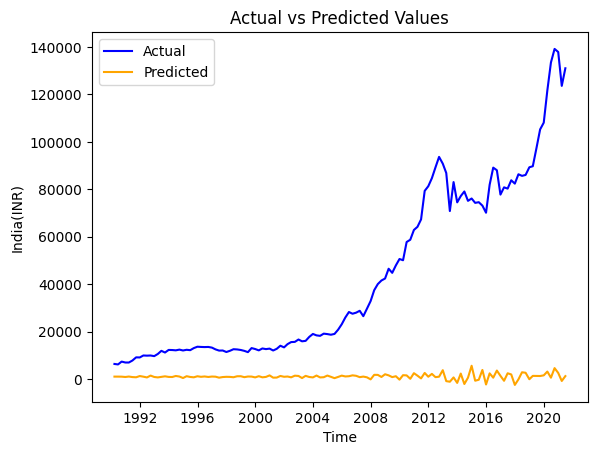

In [9]:
# Get the predicted values
pred = loaded_model.get_prediction(dynamic=False)

# Plot actual values
actual = df['India(INR)']
plt.plot(actual.index, actual, label='Actual', color='blue')

# Plot predicted values
plt.plot(pred.row_labels, pred.predicted_mean, label='Predicted', color='orange')

# Customize the plot
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('India(INR)')
plt.legend()
plt.show()

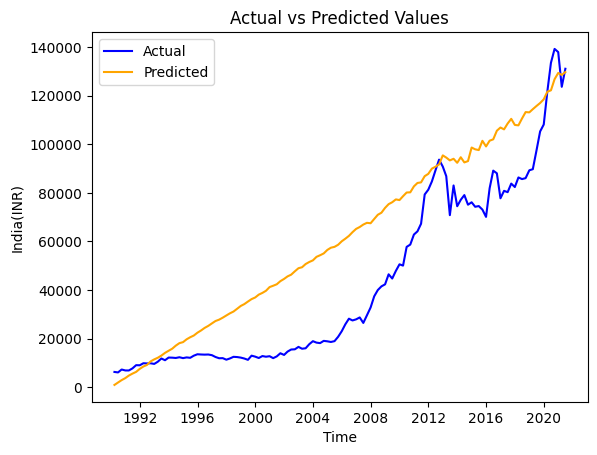

In [11]:
# Get the predicted values and confidence interval
pred = model.get_prediction(dynamic=False)

# Plot actual values
actual = df['India(INR)']
plt.plot(actual.index, actual, label='Actual', color='blue')

# Plot predicted values
ARIMA_diff_predictions_cumsum = np.cumsum(pred.predicted_mean)
plt.plot(pred.row_labels, ARIMA_diff_predictions_cumsum, label='Predicted', color='orange')

# Customize the plot
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('India(INR)')
plt.legend()
plt.show()

In [96]:
y_pred = pd.Series(model.predict(), index = df['India(INR)'][100:].index)
y_true = df['India(INR)'][100:]
ARIMA_diff_predictions_cumsum = np.cumsum(y_pred)
print(np.cumsum(model.predict(127)))

print(ARIMA_diff_predictions_cumsum)
print(np.array(y_true))

2021-12-31    324.251817
Freq: BQ-DEC, dtype: float64
Date
2015-03-31     -730.920588
2015-06-30    -1049.118549
2015-09-30     2763.852219
2015-12-31      443.719663
2016-03-31     2816.774097
2016-06-30     3362.751802
2016-09-30     6919.572606
2016-12-30     8231.889883
2017-03-31     7469.647376
2017-06-30     9875.220521
2017-09-29    11795.235243
2017-12-29     9290.032184
2018-03-30     9124.565942
2018-06-29    11952.389660
2018-09-28    14576.818027
2018-12-31    14465.387591
2019-03-29    15771.877981
2019-06-28    17056.312860
2019-09-30    18310.616286
2019-12-31    19844.614647
2020-03-31    22978.357523
2020-06-30    23524.616505
2020-09-30    28106.397289
2020-12-31    30669.747863
2021-03-31    29831.485609
2021-06-30    31044.531944
Name: predicted_mean, dtype: float64
[ 74283.9  74569.3  73123.   70125.6  81917.2  89144.   88052.   77772.2
  80834.3  80295.9  83812.1  82401.3  86343.7  85674.6  86063.7  89293.4
  89738.8  97259.7 105261.4 108120.  121719.1 133498.2 1

In [99]:
time_steps = 20

y_pred = model.forecast(steps=time_steps)

y_pred_inr = np.array(y_pred)

y_pred_stat = []

cutoff_val = df['India(INR)'][-1]
prev = cutoff_val

for i in range(time_steps):
    curr = prev + y_pred[i]
    y_pred_stat.append(curr)
    prev = curr

print(y_pred_stat)

[130045.13542651996, 130369.38724339499, 128876.20269761208, 126974.24392372562, 131488.56321721547, 133061.11489029578, 132827.0766378146, 134876.3932322755, 134688.75272934666, 137841.08104932238, 138179.5797557983, 138771.08817955636, 140071.73465733184, 140768.15282796917, 142186.09052407235, 143001.08700283014, 143587.85793918953, 145030.11777358767, 145717.9613982093, 146979.8228931527]


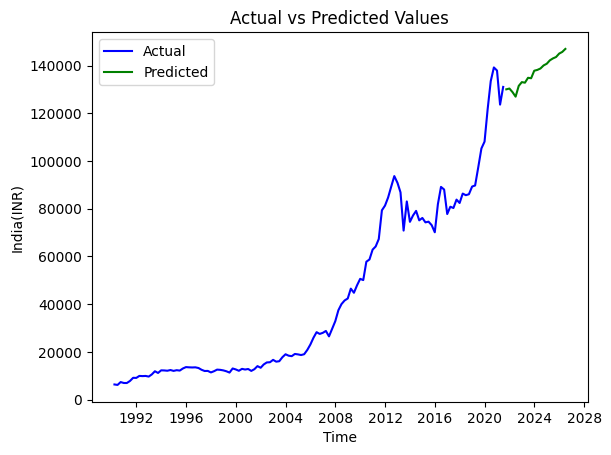

In [100]:

# Plot actual values
actual = df['India(INR)']
plt.plot(actual.index, actual, label='Actual', color='blue')

# Plot predicted values
plt.plot(y_pred.index, y_pred_stat, label='Predicted', color='green')

# Customize the plot
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('India(INR)')
plt.legend()
plt.show()

## Model pipeline with train-test split

In [82]:
train_length = 100
test_length = len(df) - train_length

training_data = df['India(INR)'][:train_length]
arima_model = ARIMA(training_data.diff(), order = (8, 0, 2))
model = arima_model.fit()
print(model.summary())

/home/mind/projects/virtual_environments/gold_rate_prediction_venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BQ-DEC will be used.
  self._init_dates(dates, freq)
/home/mind/projects/virtual_environments/gold_rate_prediction_venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BQ-DEC will be used.
  self._init_dates(dates, freq)
/home/mind/projects/virtual_environments/gold_rate_prediction_venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BQ-DEC will be used.
  self._init_dates(dates, freq)
/home/mind/projects/virtual_environments/gold_rate_prediction_venv/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using 

                               SARIMAX Results                                
Dep. Variable:             India(INR)   No. Observations:                  100
Model:                 ARIMA(8, 0, 2)   Log Likelihood                -918.573
Date:                Tue, 19 Dec 2023   AIC                           1861.145
Time:                        10:29:45   BIC                           1892.407
Sample:                    03-30-1990   HQIC                          1873.797
                         - 12-31-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        704.9609    787.223      0.896      0.371    -837.968    2247.889
ar.L1         -0.5419      0.376     -1.442      0.149      -1.279       0.195
ar.L2         -0.1455      0.307     -0.474      0.6

In [83]:
y_test_pred = model.forecast(steps=test_length)
print(y_test_pred)
y_test_pred_inr = np.array(y_test_pred)

y_test_pred_nonstat = []

cutoff_val = df['India(INR)'][train_length]
prev = cutoff_val

for i in range(test_length):
    curr = prev + y_test_pred[i]
    y_test_pred_nonstat.append(curr)
    prev = curr

print(y_test_pred_nonstat)

2015-03-31    -1738.593352
2015-06-30    -6836.246659
2015-09-30    10040.034209
2015-12-31    -7512.707779
2016-03-31     2763.108657
2016-06-30     2400.545890
2016-09-30    -3093.362729
2016-12-30     4332.727687
2017-03-31     -945.266299
2017-06-30    -2825.068913
2017-09-29     7654.172014
2017-12-29    -5844.364528
2018-03-30     3404.517573
2018-06-29     1792.903861
2018-09-28    -2835.559337
2018-12-31     4761.000123
2019-03-29    -1528.436605
2019-06-28     -921.835309
2019-09-30     5620.577794
2019-12-31    -4660.195149
2020-03-31     3681.164057
2020-06-30     1028.418310
2020-09-30    -2223.594629
2020-12-31     4569.086318
2021-03-31    -1903.369408
2021-06-30      292.140136
Freq: BQ-DEC, Name: predicted_mean, dtype: float64
[72545.30664826081, 65709.05998876787, 75749.09419809241, 68236.38641913151, 70999.49507641318, 73400.04096637416, 70306.67823705847, 74639.40592357714, 73694.13962479278, 70869.07071163323, 78523.24272549096, 72678.87819700703, 76083.39576993138,

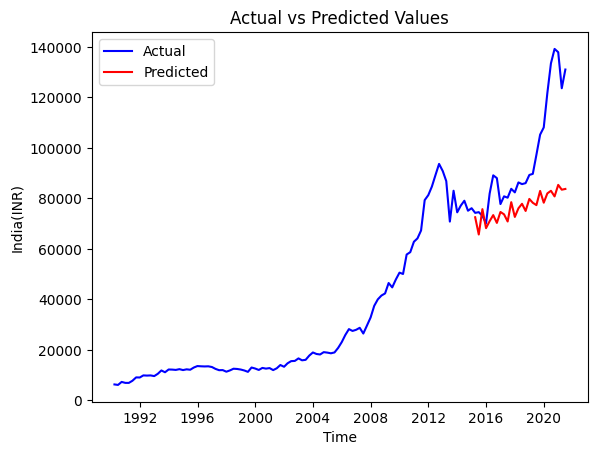

In [84]:
# Plot actual values
actual = df['India(INR)']
plt.plot(actual.index, actual, label='Actual', color='blue')

# Plot predicted values
plt.plot(y_test_pred.index, y_test_pred_nonstat, label='Predicted', color='red')

# Customize the plot
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('India(INR)')
plt.legend()
plt.show()

In [85]:
y_test = df['India(INR)'][train_length:]

mape = np.mean(np.abs(y_test_pred_nonstat-y_test)/np.abs(y_test)) # mean absolute percentage error
mae = np.mean(np.abs(y_test_pred_nonstat-y_test))                 # mean absolute error
mpe = np.mean((y_test_pred_nonstat-y_test)/y_test)                # mean percentage error
rmse = np.mean((y_test_pred_nonstat-y_test)**2)**0.5              # root mean square error
corr = np.corrcoef(y_test_pred_nonstat, y_test)[0, 1]             # correlation coefficient

pprint.pprint({'mape': mape,
               'mae': mae,
               'mpe': mpe,
               'rmse': rmse,
               'corr': corr})

{'corr': 0.8235013365914111,
 'mae': 19420.272279830366,
 'mape': 0.17687486134918087,
 'mpe': -0.174112293538682,
 'rmse': 25935.544098872062}


## Hyperparameter tuning using for loop

In [ ]:
p = range(0, 9)
q = range(0, 9)
d = range(0, 2)

pdq_combinations = list(itertools.product(p, d, q))
print(pdq_combinations)

train_length = 100
test_length = len(df) - train_length

training_data = df['India(INR)'][:train_length]

for order in pdq_combinations:
    
    arima_model = ARIMA(training_data.diff(), order = order, enforce_stationarity=False)
    model = arima_model.fit()
    # print(model.summary())

    y_test_pred = model.forecast(steps=test_length)
    # print(y_test_pred)
    y_test_pred_inr = np.array(y_test_pred)

    y_test_pred_nonstat = []

    cutoff_val = df['India(INR)'][train_length]
    prev = cutoff_val

    for i in range(test_length):
        curr = prev + y_test_pred[i]
        y_test_pred_nonstat.append(curr)
        prev = curr

    # print(y_test_pred_nonstat)
        
    y_test = df['India(INR)'][train_length:]

    mape = np.mean(np.abs(y_test_pred_nonstat-y_test)/np.abs(y_test)) # mean absolute percentage error

    if mape <= 0.15:

        # Plot actual values
        actual = df['India(INR)']
        plt.plot(actual.index, actual, label='Actual', color='blue')

        # Plot predicted values
        plt.plot(y_test_pred.index, y_test_pred_nonstat, label='Predicted', color='red')

        # Customize the plot
        plt.title('Actual vs Predicted Values')
        plt.xlabel('Time')
        plt.ylabel('India(INR)')
        plt.legend()
        plt.show()

        print(f'MAPE: {mape} for order = {order}')